<a href="https://colab.research.google.com/github/princecj65779/602-Logistic-Regression/blob/main/602_Logistic_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.1 Loading Libararies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px #for plots

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate


In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/princecj65779/602-Logistic-Regression/main/Data/pima_indian_data.csv',encoding='utf8',error_bad_lines = False)

In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.isna().sum()


Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

In [5]:
pima.shape

(768, 9)

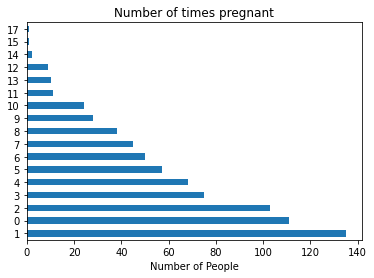

In [6]:
pima['Number  of times pregnant'].value_counts().plot.barh()
plt.title('Number of times pregnant')
plt.xlabel('Number of People')
plt.show()

In [7]:
def check_df(dataframe: object, head: object = 5) -> object:
    print("########################### Shape ###########################")
    print(dataframe.shape)

    print("########################### Types ###########################")
    print(dataframe.dtypes)

    print("########################### Head ###########################")
    print(dataframe.head(head))

    print("########################### Tail ###########################")
    print(dataframe.tail(head))

    print("########################### NA ###########################")
    print(dataframe.isnull().sum())

In [8]:
check_df(pima)


########################### Shape ###########################
(768, 9)
########################### Types ###########################
Number  of times pregnant       int64
Plasma glucose                  int64
Diastolic blood pressure        int64
Triceps skinfold thickness      int64
serum insulin                   int64
Body mass index               float64
Diabetes pedigree function    float64
Age                             int64
Class                           int64
dtype: object
########################### Head ###########################
   Number  of times pregnant  Plasma glucose  ...  Age  Class
0                          6             148  ...   50      1
1                          1              85  ...   31      0
2                          8             183  ...   32      1
3                          1              89  ...   21      0
4                          0             137  ...   33      1

[5 rows x 9 columns]
########################### Tail #######################

In [9]:
pima.groupby(['Class']).agg({"Age":["mean", "median"],
                            "Plasma glucose":["mean","median"],
                            "Number  of times pregnant":["mean", "median"],
                            "Body mass index":["mean", "median"],
                            "Triceps skinfold thickness":["mean", "median"]})

Age        Plasma glucose  ... Body mass index Triceps skinfold thickness       
            mean median           mean  ...          median                       mean median
Class                                   ...                                                  
0      31.190000     27     109.980000  ...           30.05                  19.664000     21
1      37.067164     36     141.257463  ...           34.25                  22.164179     27

[2 rows x 10 columns]

In [10]:
pima.rename(columns={'Number  of times pregnant': 'PregnancyCount','Plasma glucose': 'Plasma_glucose', 'Diastolic blood pressure': 'Diastolic_BP'

, 'Triceps skinfold thickness': 'Skinfold' , 'serum insulin': 'Insulin',

'Body mass index': 'BMI',

'Diabetes pedigree function': 'Diabetes_pedigree_function',}, inplace=True)

## **1.2 EDA**

In [11]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PregnancyCount              768 non-null    int64  
 1   Plasma_glucose              768 non-null    int64  
 2   Diastolic_BP                768 non-null    int64  
 3   Skinfold                    768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_pedigree_function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


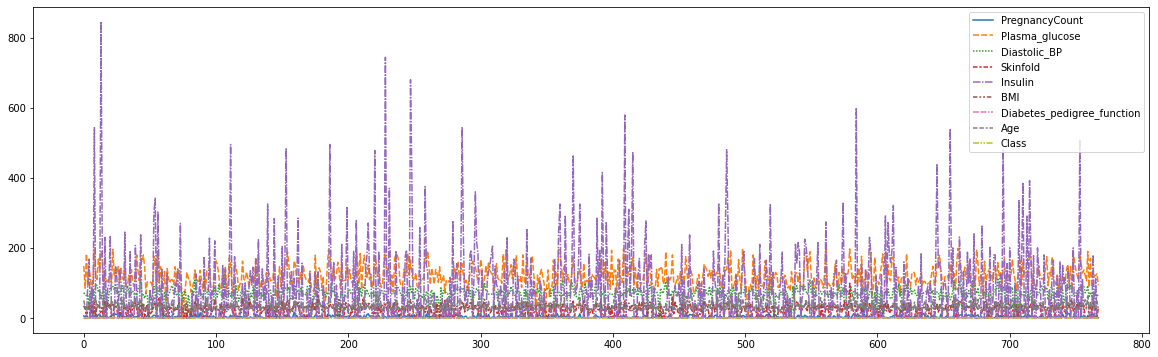

In [12]:
plt.figure(figsize=(20,6))
sns.lineplot(data=pima)

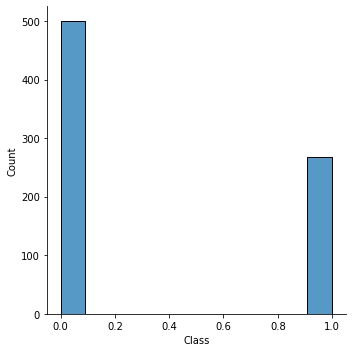

In [13]:
sns.displot(data=pima,x='Class')

In [14]:
px.pie(pima, names="Class")

Pie Chart with class 0 and class 1

**Blood Pressure vs Class**

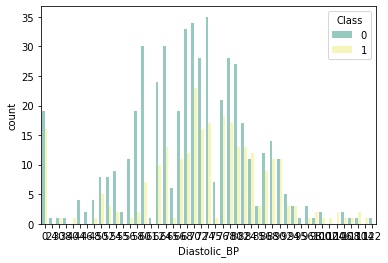

In [15]:
sns.countplot(data=pima,x='Diastolic_BP',hue='Class',palette='Set3')

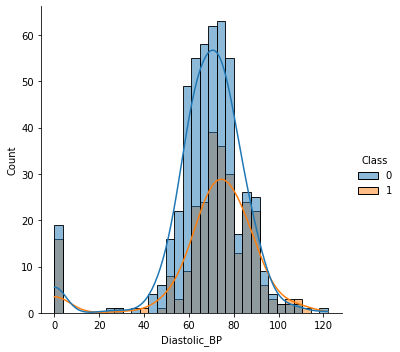

In [16]:
sns.displot(data=pima,x='Diastolic_BP',hue='Class',kde=True)

*We see that Blood preesure for diapetics are high*

**Glucose VS Class**

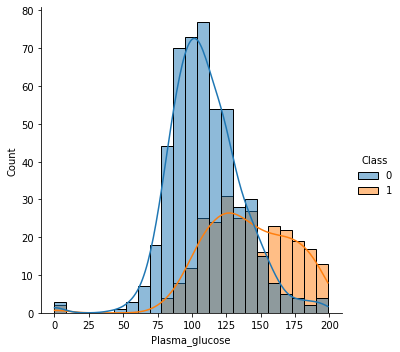

In [17]:
sns.displot(data=pima,x='Plasma_glucose',hue='Class',kde=True)


Glucose of diabetics are also high

**Pregnencies vs Class**

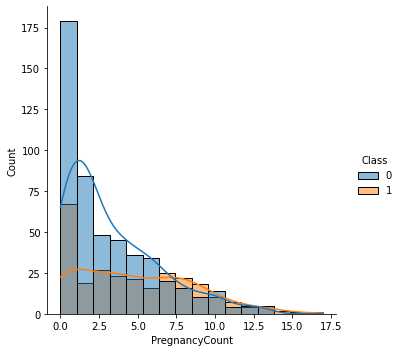

In [18]:
sns.displot(data=pima,x='PregnancyCount',hue='Class',kde=True)

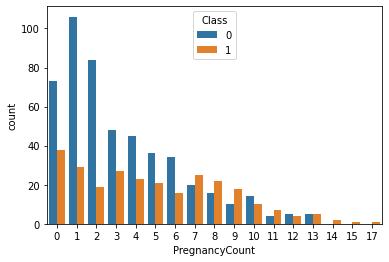

In [19]:
sns.countplot(data=pima,x='PregnancyCount',hue='Class')

**SkinThickness VS Class**

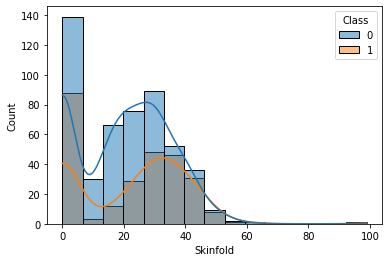

In [20]:
sns.histplot(data=pima,x='Skinfold',hue='Class',kde=True)

**Insulin vs Class**

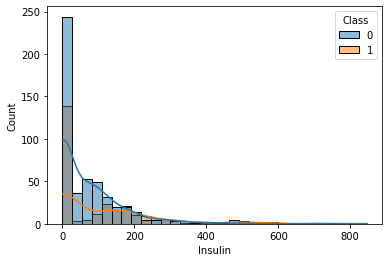

In [21]:
sns.histplot(data=pima,x='Insulin',hue='Class',kde=True)

**Age vs Class**

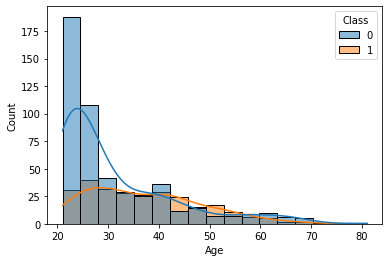

In [22]:
sns.histplot(data=pima,x='Age',hue='Class',kde=True)

**BMI vs Class**

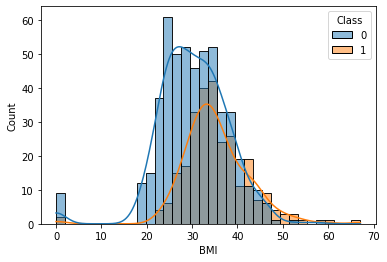

In [23]:
sns.histplot(data=pima,x='BMI',hue='Class',kde=True)

**Diabetes pedigree function VS Class**

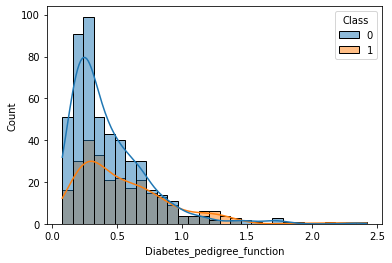

In [24]:
sns.histplot(x="Diabetes_pedigree_function", hue="Class", data=pima, kde=True)

**Pairplot**

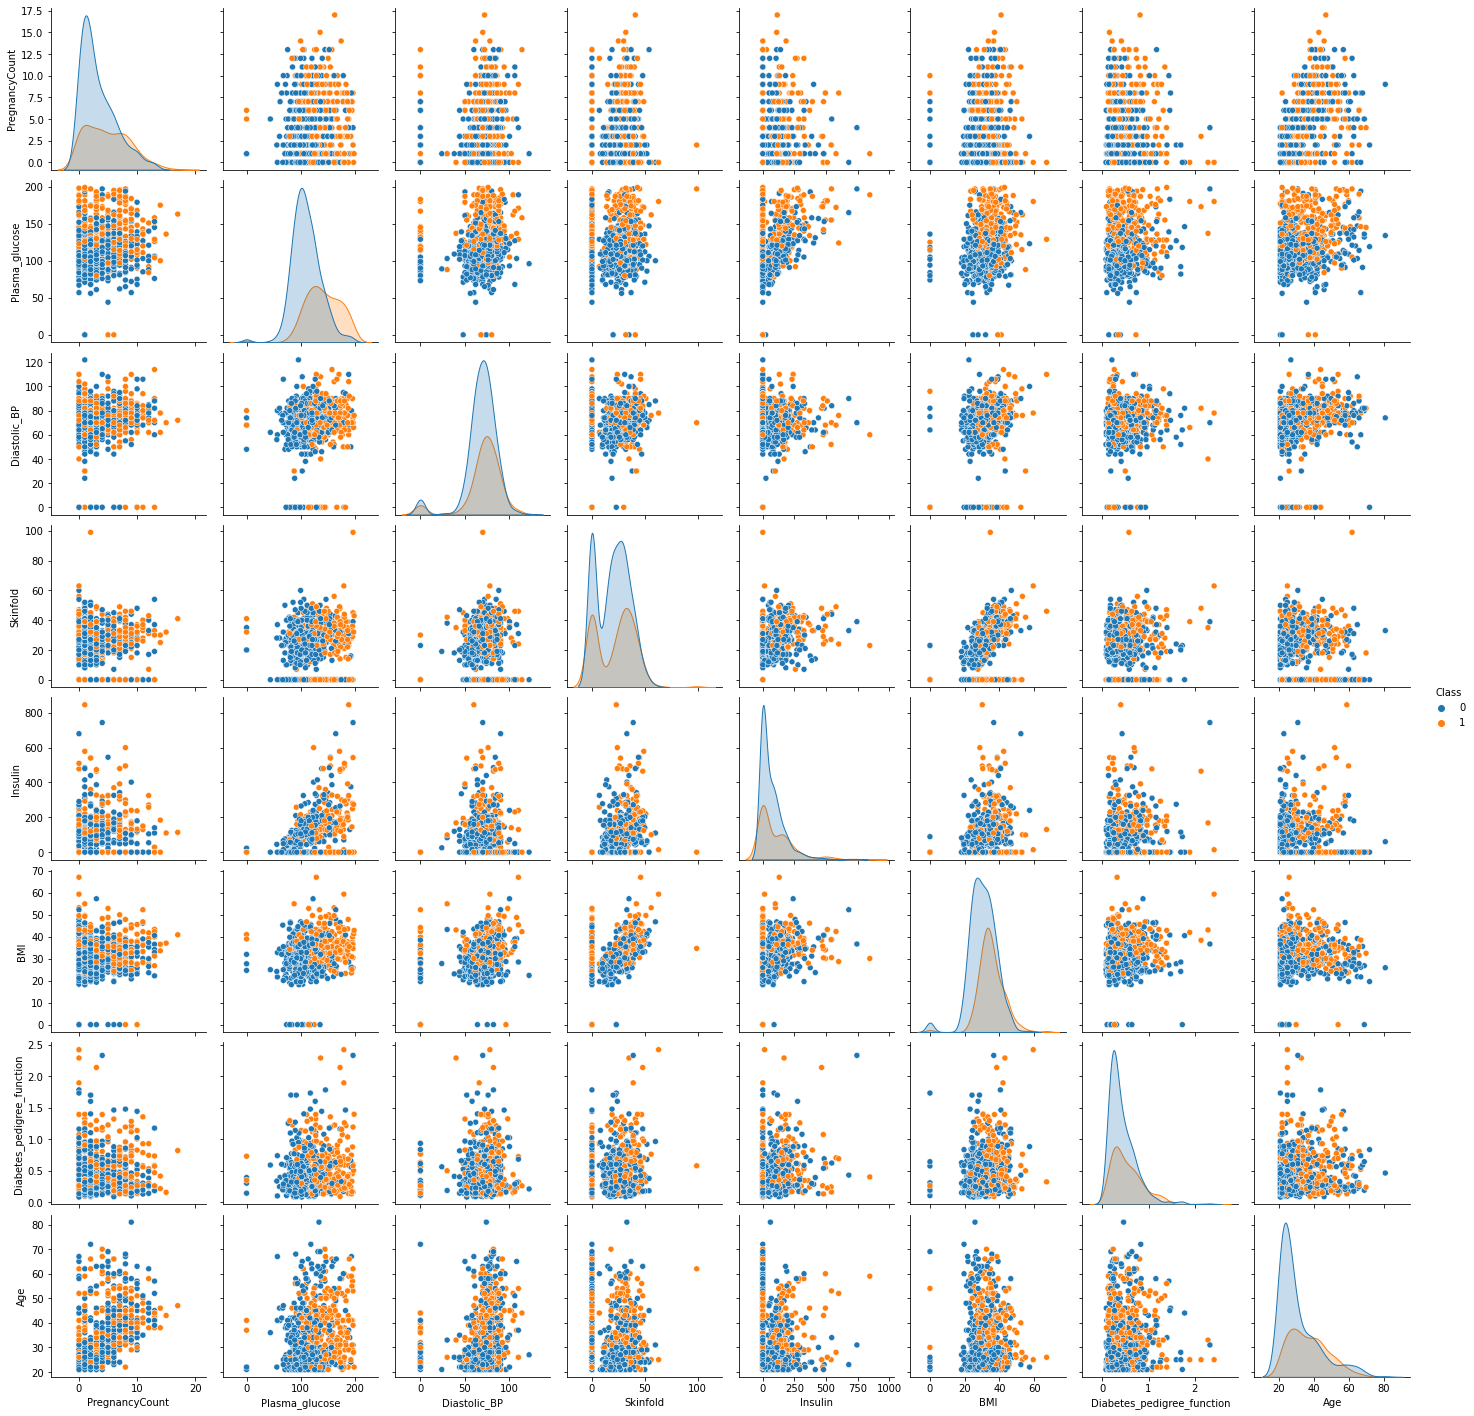

In [25]:
sns.pairplot(pima, hue='Class')

**Boxplots**

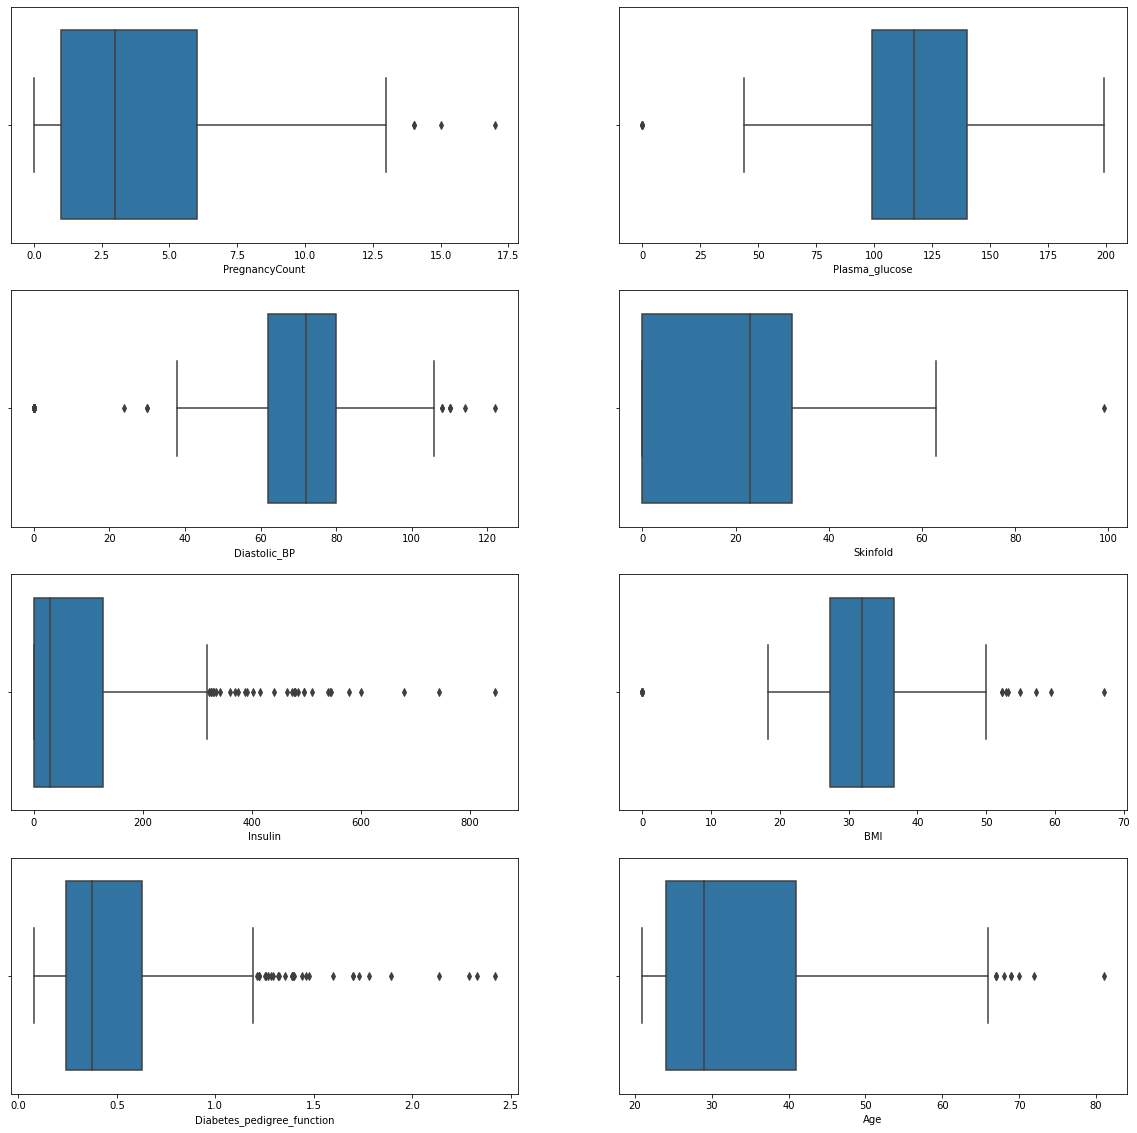

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs = axs.flatten()
for i in range(len(pima.columns)-1):
    sns.boxplot(data=pima, x=pima.columns[i], ax=axs[i])

**Correlation Matrix**

Text(0.5, 1.0, 'Correlation Map')

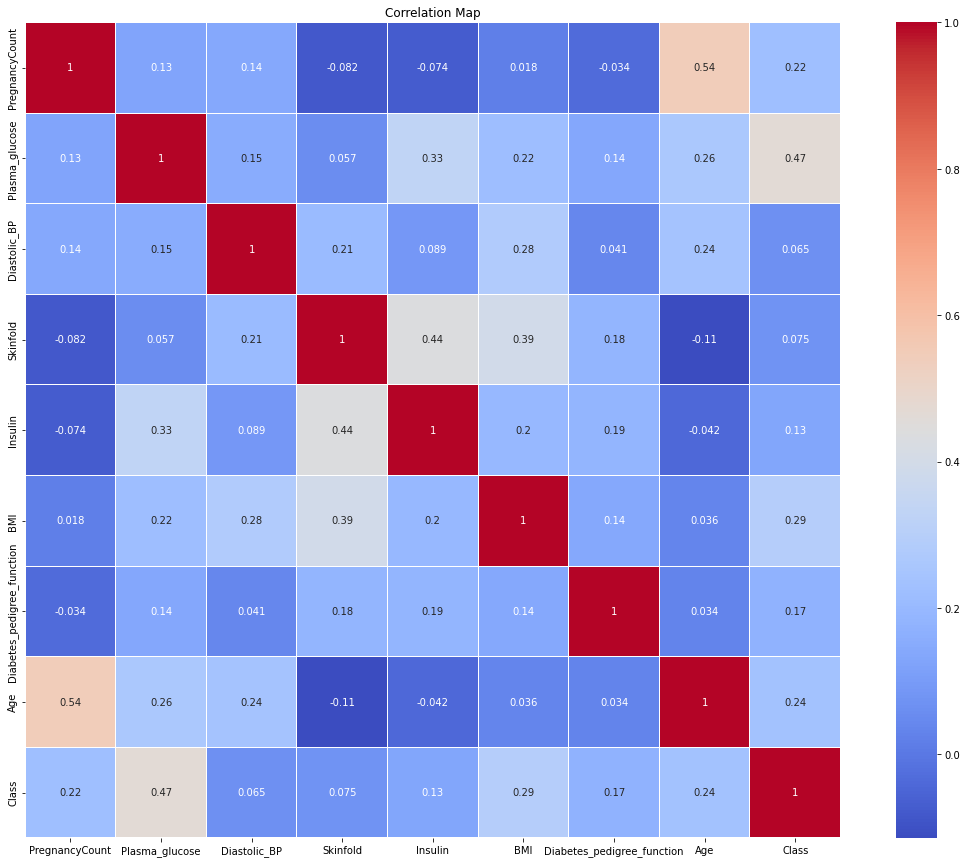

In [27]:
plt.subplots(figsize=(20,15))

sns.heatmap(pima.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Map")

**Checking Skewness**


* Number  of times pregnant     0
* Plasma glucose                0
* Diastolic blood pressure      0
* Triceps skinfold thickness    0
* serum insulin                 0
* Body mass index               0
* Diabetes pedigree function    0
* Age                           0
* Class                         0
dtype: int64

In [28]:
pima["Plasma_glucose"] = pima["Plasma_glucose"].apply(lambda x: np.nan if x == 0 else x)
pima["Diastolic_BP"] = pima["Diastolic_BP"].apply(lambda x: np.nan if x == 0 else x)
pima["Skinfold"] = pima["Skinfold"].apply(lambda x: np.nan if x == 0 else x)
pima["Insulin"] = pima["Insulin"].apply(lambda x: np.nan if x == 0 else x)
pima["BMI"] = pima["BMI"].apply(lambda x: np.nan if x == 0 else x)

In [29]:
pima.skew()

PregnancyCount                0.901674
Plasma_glucose                0.530989
Diastolic_BP                  0.134153
Skinfold                      0.690619
Insulin                       2.166464
BMI                           0.593970
Diabetes_pedigree_function    1.919911
Age                           1.129597
Class                         0.635017
dtype: float64

imputing highly skewed values with median elsewise mean

In [30]:
pima['Insulin'].isna().sum()

374

In [31]:
pima.drop(columns=["Insulin"], inplace=True)

In [32]:
# Highly skewed

pima["BMI"].replace(to_replace=np.nan,value=pima["BMI"].median(), inplace=True)
pima["PregnancyCount"].replace(to_replace=np.nan,value=pima["PregnancyCount"].median(), inplace=True)
#df["Insulin"].replace(to_replace=np.nan,value=df["Insulin"].median(), inplace=True)

# Normal
pima["Plasma_glucose"].replace(to_replace=np.nan,value=pima["Plasma_glucose"].mean(), inplace=True)
pima["Diastolic_BP"].replace(to_replace=np.nan,value=pima["Diastolic_BP"].mean(), inplace=True)
pima["Skinfold"].replace(to_replace=np.nan,value=pima["Skinfold"].mean(), inplace=True)

### **Dealing with Outliers**

In [33]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
Tot_IQR = Q3 - Q1
print(Tot_IQR)

PregnancyCount                 5.0000
Plasma_glucose                40.5000
Diastolic_BP                  16.0000
Skinfold                       7.0000
BMI                            9.1000
Diabetes_pedigree_function     0.3825
Age                           17.0000
Class                          1.0000
dtype: float64


In [34]:
pima_out = pima[~((pima < (Q1 - 1.5 * Tot_IQR)) | (pima > (Q3 + 1.5 * Tot_IQR))).any(axis=1)]
print(f'Before: {pima.shape}, After: {pima_out.shape}')

Before: (768, 8), After: (627, 8)


In [35]:
pima_out.describe()

,PregnancyCount,Plasma_glucose,Diastolic_BP,Skinfold,BMI,Diabetes_pedigree_function,Age,Class
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,3.910686,120.975174,72.099475,28.770683,32.108453,0.421432,32.958533,0.341308
std,3.246280,29.906857,10.677842,6.071456,6.120735,0.249638,11.126984,0.474527
min,0.000000,44.000000,44.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,26.000000,27.600000,0.236500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,32.000000,0.343000,29.000000,0.000000
75%,6.000000,140.000000,78.000000,31.000000,35.800000,0.583000,40.000000,1.000000
max,13.000000,198.000000,104.000000,42.000000,49.600000,1.191000,66.000000,1.000000


## **Splitting the Data**

In [123]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 614
Test sample: 154


In [65]:
# Defining our features and target
X = pima.drop('Class',axis=1)
y = pima['Class']
# Splitting the dataset using train_test_split() in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Using Standard Scaler to fit and transform the training data but only transforming the test data, so that no data leakage happens
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
# Re-assigning the columns
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 614
Test sample: 154


## **Creating Pipeline**

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [108]:
rf_params = {'criterion' : ['gini', 'entropy'],                                               # Random Forest
             'n_estimators': list(range(60, 140, 20)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_train_norm, y_train)
rf_pred = rf_model.predict(X_test_norm)

print("\nRandom Forest Classifier: \n", classification_report(y_test, rf_pred))


Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        99
           1       0.77      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [102]:
y = pima["Class"]
X = pima.drop(["Class"], axis=1)

log_model = LogisticRegression().fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### **Model Validation: 10-Fold Cross Validation**

In [103]:
cv_results = cross_validate(log_model,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [104]:
y_pred = log_model.predict(X)

#### **Confusion Matrix**

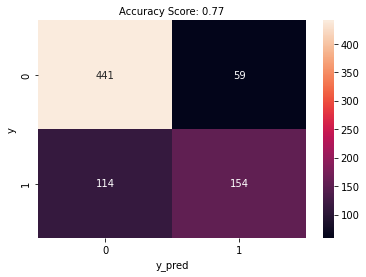

In [105]:
# Confusion Matrix log reg
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

* **true positive:** for correctly predicted event values. 441
* **false positive:** for incorrectly predicted event values. 59
* **true negative:** for correctly predicted no-event values. 114
* **false negative:** for incorrectly predicted no-event values.154

In [106]:
# ROC AUC
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.844768656716418

Random forest classifier has the best recall and precision

### **Metric Selection**

We choose the recall metric as recall identifies the true positive rate, which is required in this analysis as we're predicting the outcome of the class using itself as a categorical variable.

### **Regularization**

1st max value of 0.517 occured at C=0.100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0, 0.5, 'recall score')

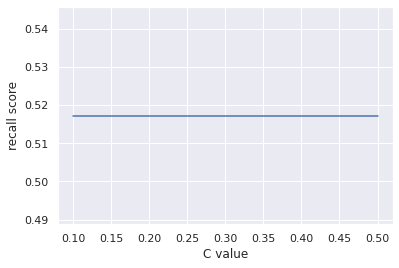

In [125]:
from sklearn import metrics

# Using 5 different regularization strengths
C_start = 0.1
C_end = 0.6
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=43)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
       
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))


# Let's plot the changes in C-values against recall scores to see how the regularization scores impact the recall score

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [113]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(use_pca = False, comp=None):
    if use_pca:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('pca', PCA(n_components=comp)),
             ('model', LogisticRegression(penalty='none'))
            ]
        )
    else:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression(penalty='none'))
            ]
        )

    return modeling_pipeline

m_rawFeatures = generate_estimates(use_pca=False).fit(X_train, y_train)
print(m_rawFeatures)

m_pca_models = {}
for i in range(1,6):
    m_pca_models[i] = generate_estimates(use_pca=True, comp=i).fit(X_train, y_train)
    print(m_pca_models[i])
    
print('Models fitted')

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=1,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
          

In [114]:
classifier=tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print(accuracy_score(y_test,predictions))
print(precision_score(y_test,predictions))

NameError: ignored

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline

from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, X_train, y_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
cv_results

{'fit_time': array([0.01339245, 0.00653934, 0.00757718, 0.00656223, 0.00764275]),
 'score_time': array([0.00633621, 0.00586629, 0.00729227, 0.00604534, 0.00705767]),
 'test_accuracy': array([0.7398374 , 0.79674797, 0.74796748, 0.73170732, 0.7704918 ]),
 'test_f1_macro': array([0.70361446, 0.75651279, 0.70698532, 0.69233685, 0.72416021]),
 'test_precision': array([0.63157895, 0.8       , 0.67647059, 0.63888889, 0.73333333]),
 'test_recall': array([0.57142857, 0.55813953, 0.53488372, 0.53488372, 0.52380952]),
 'test_roc_auc': array([0.80482069, 0.86046512, 0.83866279, 0.83488372, 0.85446429])}

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )


from sklearn.model_selection import GridSearchCV

param_grid = [
  {'logreg__C': [1, 10, 100, 1000], 'pca__n_components': [1,2,3,4,5,10,15]}
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'


/usr/local/lib/python3.7/dist-packages/sklearn

In [117]:
gcv_results.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [118]:
gcv_results.best_score_

0.7605757696921231